<a href="https://colab.research.google.com/github/Aniketxmishra/el/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import pandas as pd
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")  # Adjust filename if needed


In [3]:
import pandas as pd

# Adjust the filename if needed
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

# Explore the data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

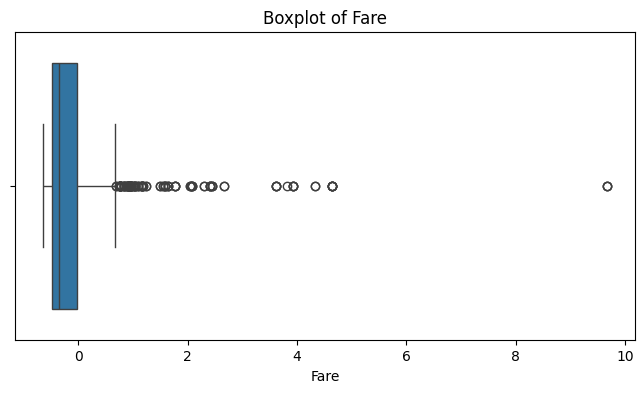


Final dataset info:

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Sex_male     775 non-null    bool   
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 62.8+ KB

Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_male       0
Embarked_Q     

In [7]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Load the dataset (adjust the filename/path as needed)
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

# 3. Explore the dataset
print("First 5 rows:\n", df.head())
print("\nData info:\n")
df.info()
print("\nMissing values per column:\n", df.isnull().sum())
print("\nStatistical summary:\n", df.describe())

# 4. Drop columns with too many missing values (e.g., 'Cabin')
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# 5. Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 6. Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# 7. Encode categorical variables
# For 'Sex' and 'Embarked' (if present)
categorical_cols = []
if 'Sex' in df.columns:
    categorical_cols.append('Sex')
if 'Embarked' in df.columns:
    categorical_cols.append('Embarked')
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 8. Standardize numerical features
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])

# 9. Visualize and remove outliers (example: 'Fare')
if 'Fare' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['Fare'])
    plt.title('Boxplot of Fare')
    plt.show()
    # Remove outliers using IQR
    Q1 = df['Fare'].quantile(0.25)
    Q3 = df['Fare'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

# 10. Final check
print("\nFinal dataset info:\n")
df.info()
print("\nMissing values after cleaning:\n", df.isnull().sum())

# 11. Save the cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

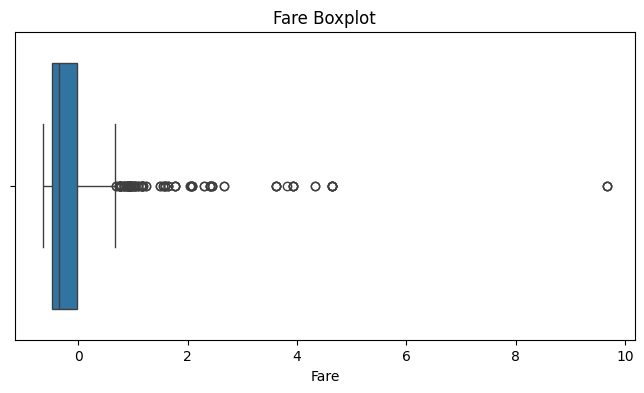

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Fare         775 non-null    float64
 8   Sex_male     775 non-null    bool   
 9   Embarked_Q   775 non-null    bool   
 10  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(1)
memory usage: 56.8+ KB
None
PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64
Cleaned dataset saved as 'titanic_cleaned.csv'


In [9]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Load the Dataset
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")


# 3. Basic Exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# 4. Drop Unnecessary Columns (if present)
if 'Cabin' in df.columns:
    df = df.drop(['Cabin'], axis=1)
if 'Ticket' in df.columns:
    df = df.drop(['Ticket'], axis=1)

# 5. Handle Missing Values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
if 'Embarked' in df.columns:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 6. Remove Duplicates
df = df.drop_duplicates()

# 7. Encode Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 8. Feature Scaling (Standardization)
scaler = StandardScaler()
for col in ['Age', 'Fare']:
    if col in df.columns:
        df[[col]] = scaler.fit_transform(df[[col]])

# 9. Outlier Detection and Removal (using IQR for 'Fare')
if 'Fare' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['Fare'])
    plt.title('Fare Boxplot')
    plt.show()
    Q1 = df['Fare'].quantile(0.25)
    Q3 = df['Fare'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

# 10. Final Check
print(df.info())
print(df.isnull().sum())

# 11. Save Cleaned Dataset
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved as 'titanic_cleaned.csv'")
